In [1]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.graphics.tsaplots as tsaplots
from collections import OrderedDict
import GPy as gpy
import pandas as pd
import os.path 
import os
import seaborn as sns
import statsmodels.regression.quantile_regression as QuantReg
import tensorflow as tf
import sklearn
import scipy.stats
import scipy.optimize
from scipy.stats import cauchy
import numpy as np
import matplotlib.pyplot as plt
import tqdm as tqdm
from sklearn import preprocessing
%matplotlib inline

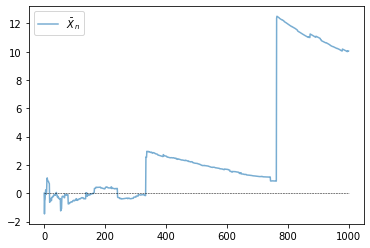

In [2]:

np.random.seed(1234)
N = 1_000

distribution = cauchy()

fig, ax = plt.subplots()
data = distribution.rvs(N)

# Compute sample mean at each n
sample_mean = np.empty(N)
for n in range(1, N):
    sample_mean[n] = np.mean(data[:n])

# Plot
ax.plot(range(N), sample_mean, alpha=0.6, label='$\\bar X_n$')

ax.plot(range(N), np.zeros(N), 'k--', lw=0.5)
ax.legend()

plt.show()

In [3]:
def qpk(params, z):
    return params[0] + params[1] * (1./params[2] * ( np.exp(params[2] * z ) - 1. ) * np.exp( params[3]*z**2. / 2.))

In [4]:
def estimateTukeyDistribution(Y):
    """
    Tukey Estimation based on Genton's paper 2.1 sect
    """
    p = np.linspace(1e-2, 1-1e-2, 50)
    
    zpk =scipy.stats.norm.ppf( p )
    qhat = np.percentile( Y, p*100 )
    
    def qresiduals( params, zpk, qhat):
        return np.sum((qhat - qpk( params, zpk ))**2)
    
    mu = np.mean(Y)
    std = np.std(Y-mu)
    
    res= scipy.optimize.least_squares( qresiduals, x0=(mu, std, 0.6, 0.2), bounds=( np.array([-np.inf, 1e-2, -np.inf, 1e-2]),\
                                              np.array([np.inf, np.inf, np.inf, np.inf])), args= (zpk, qhat) )
    return res

In [5]:
Z= np.random.normal(size=(5000,))

In [6]:
resid= estimateTukeyDistribution(Z)

In [7]:
Y_hat = qpk(resid.x, Z)

In [8]:
params = dict( zip(['loc','scale','g','h'], resid.x))

In [9]:
import seaborn as sns

In [10]:
sns.distplot?

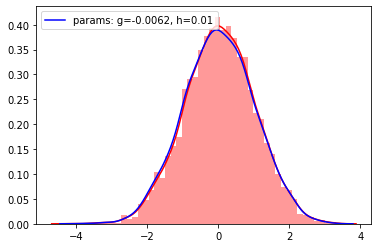

In [11]:
sns.distplot(Y_hat, hist=True, color ='red')
sns.distplot(Z, hist=False, color= 'blue',hist_kws= {"linewidth":2.5}, label ='%s: g=%3.2g, h=%3.2g' % (str('params'),params['g'], params['h']))

In [12]:
def buildTukeyEstimator(data, feature, targetFeature, groupby, display=True):
    """
    data: Pandas Core DataFrame- index, direction, issuer, cbbt mid spread, rs vol, target
    feature: string that is essentially part of the data DataFrame
    targetFeature : string that is essentially part of the data DataFrame
    groupBy: also an array of 2 strings or more!
    """
    results = []
    try:
        group1 = list( data[groupby[0]].dropna().unique().sort_values() )
    except:
        group1 = sorted( list( rfqData[groupBy[0]].dropna().unique() ) )
    try:
        group2 = list(rfqData[groupBy[1]].dropna().unique().sort_values() )
    except:
        group2 = sorted( list (rfqData[groupBy[1]].dropna().unique( ) ) )
    ROWS = len( group1 )
    COLS = len( group2 )
    if display:
        fig, axes = plt.subplots( ROWS, COLS, figsize = (COLS*5, ROWS*5), sharey ='row')
        colorMap = {'ColorOne': 'b', 'ColorTwo':'r'}
    for i, j in tqdm(itertools.product( range(ROWS ), range( COLS)) ):
        lims =(np.inf, -np.inf)
        for side in ['BUY','SIDE']:
            rowGroup, colGroup= group1[i], group2[j]
            
                      
    

In [13]:
columns = ["Asset1", "Asset2", "Asset3"]

df = pd.DataFrame( columns=columns)

In [14]:
df["Asset1"] = np.random.gumbel(size=(5000,))
df["Asset2"] = np.random.normal(size=(5000,))
df["Asset3"] = np.random.poisson(size=(5000,))


In [17]:
df

,Asset1,Asset2,Asset3
0,-0.514024,0.635998,3
1,1.294864,-0.662412,0
2,-1.223066,1.679571,5
3,-0.906858,0.291606,2
4,1.006707,0.006994,2
5,-0.219006,-1.214639,0
6,-0.365310,-0.910369,0
7,-0.003137,-0.004129,0
8,0.311384,-0.634294,0
9,-0.094165,-0.349309,1
